In [1]:
import tensorflow as tf

In [23]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tf.executing_eagerly()

- tf.executing_eagerly()는 원래 tf는 코드를 돌리면 그래프를 만들고 함수를 실행하는데 그래프 만드는 것을 건너뛰고 바로 함수를 돌리게 하는 코드이다.

In [4]:
print(tf.__version__)

2.2.0


In [26]:
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

W = tf.Variable(2.9)
b = tf.Variable(0.5)

# hypohthesis = wx + b
hypothesis = W * x_data + b

In [27]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data))

In [28]:
W.numpy(), b.numpy(), hypothesis.numpy()

(2.9,
 0.5,
 array([ 3.4     ,  6.3     ,  9.200001, 12.1     , 15.      ],
       dtype=float32))

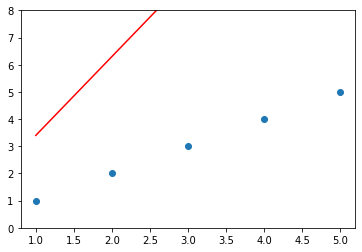

In [29]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()

# minimize cost - gradient descent

In [33]:
learning_rate = 0.01

# with A as B: with 구문 안에 있는 변수들을 B에 저장
# 이후에 tape.gradient()를 통해서 변수들의 미분값을 할당한다.
# tape.gradient(cost, [W, b])라고 하면 cost함수에 대한 변수들의 미분값을 할당한다.
with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
W_grad, b_grad = tape.gradient(cost, [W, b])

# A.assign_sub(B): A = A - B
W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=0.28135997>

(0, 8)

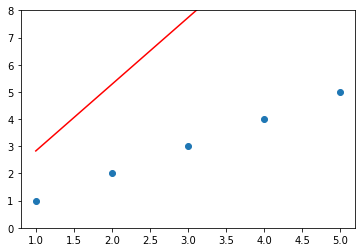

In [34]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)

# Parameter(W, b) update

In [35]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)
learning_rate = 0.01

for i in range(100):
    # Gradient Descent
    with tf.GradientTape() as tape:
        hypothesis = W*x_data + b
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 10 == 0:
        print('{:5} | {:10.4} | {:10.4} | {:10.6f}'.format(i, W.numpy(), b.numpy(), cost))

    0 |      2.452 |      0.376 |  45.660004
   10 |      1.104 |   0.003398 |   0.206336
   20 |      1.013 |   -0.02091 |   0.001026
   30 |      1.007 |   -0.02184 |   0.000093
   40 |      1.006 |   -0.02123 |   0.000083
   50 |      1.006 |   -0.02053 |   0.000077
   60 |      1.005 |   -0.01984 |   0.000072
   70 |      1.005 |   -0.01918 |   0.000067
   80 |      1.005 |   -0.01854 |   0.000063
   90 |      1.005 |   -0.01793 |   0.000059


- 갈수록 W의 값은 1에 b의 값은 0에 가까워짐에 따라 cost도 0에 가까워지고 있다.

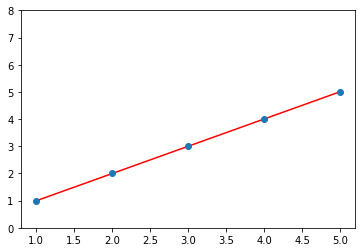

In [36]:
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.plot(x_data, y_data, 'o')
plt.ylim(0, 8)
plt.show()